# Run PEST and Parallel PEST
### This should be super easy ~

In [19]:
%matplotlib inline
import os
import sys
import pyemu

In [10]:
from swatmf import swatmf_pst_utils, swatmf_viz

# 1. Specify a path to the model folder

In [4]:
wd = "D:/Workshops/20220724_kict/Day03/example_dataset/SWAT-MODFLOW"
os.chdir(wd)

# 2. Initial run for adjusting weights

In [6]:
pst_name = 'mb_pest.pst'
os.system("start cmd /k i64pest {0}".format(pst_name))

0

## 2.3 Change weights to make all of observation data visible 

In [7]:
pst_name_rw = "mb_pest_rw.pst"
contrib = 3003.0

In [8]:
os.system("start cmd /k i64pwtadj1 {0} {1} {2}".format(pst_name, pst_name_rw, contrib))

0

# 3. Let's perform a parallel processing with the "BeoPEST" 

In [11]:
swatmf_pst_utils.execute_beopest(wd, pst_name_rw, num_workers=3)

In [12]:
os.chdir(wd)

# 4. Let's see how we did:

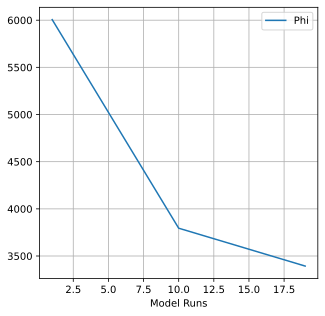

In [20]:
swatmf_viz.phi_progress_plot(pst_name_rw)

In [21]:
pst = pyemu.Pst(os.path.join(wd, pst_name_rw))
pst.phi

2967.929094681307

In [22]:
pst.res.loc[pst.nnz_obs_names,:]

,name,group,measured,modelled,residual,weight
name,,,,,,
g_5699_19851130,g_5699_19851130,g_5699,-0.777000,-0.7300,-0.047000,126.71000
g_5699_19851201,g_5699_19851201,g_5699,-0.823000,-0.7700,-0.053000,126.71000
g_5699_19851202,g_5699_19851202,g_5699,-0.838000,-0.7970,-0.041000,126.71000
g_5699_19851203,g_5699_19851203,g_5699,-0.838000,-0.8190,-0.019000,126.71000
g_5699_19851204,g_5699_19851204,g_5699,-0.838000,-0.8320,-0.006000,126.71000
...,...,...,...,...,...,...
rch058_19850926,rch058_19850926,rch058,0.018689,0.4870,-0.468311,1.00003
rch058_19850927,rch058_19850927,rch058,0.018689,0.4677,-0.449011,1.00003
rch058_19850928,rch058_19850928,rch058,0.025202,0.7040,-0.678798,1.00003


<Figure size 576x756 with 0 Axes>

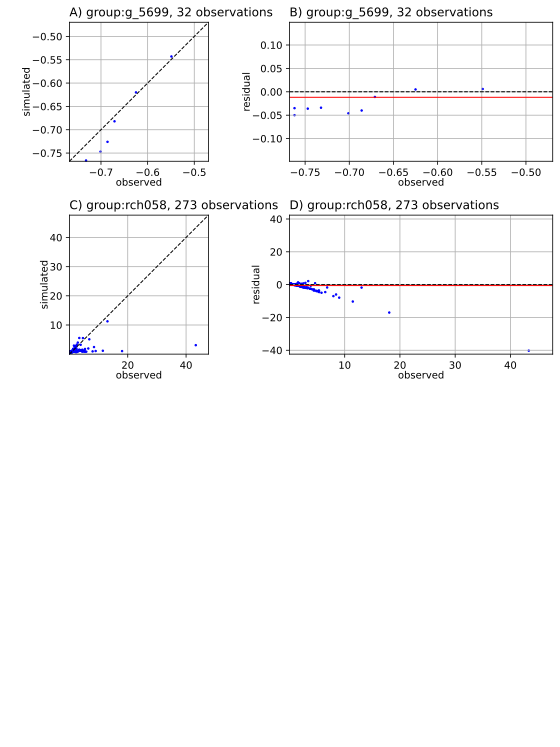

In [23]:
figs = pst.plot(kind="1to1")